In [10]:
from paint.standard2 import cm_tmp
from toolbox import EasyMap, pc, ccrs
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from shapely.geometry import Point
import pandas as pd
from herbie import Herbie
from paint.terrain2 import cm_terrain 
import matplotlib.colors as colors
import numpy as np
from metpy.plots import USCOUNTIES
import plotly.io as pio


save_dir = "/media/kaleb/extraSpace/wrf/"
pred_hours = 0

In [5]:
# find dates that have wayyy different figures
# spring
spring_date = "20220412 11:00" #anywhere from march to june

spring_herb = Herbie(spring_date, model="hrrr",
                  product="sfc", save_dir=save_dir,
                  verbose=True, fxx=pred_hours,
                  priority= ['pando', 'pando2', 'aws', 'nomads',
                                           'google', 'azure'],# ['pando', 'pando2', 'aws', 'nomads'],
                  overwrite=False).xarray(":(?:TMP|RH):2 m")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Apr-12 11:00 UTC F00 ┊ GRIB2 @ pando ┊ IDX @ pando


<xarray.DataArray 'latitude' (y: 1059, x: 1799)>
array([[21.138123  , 21.14511004, 21.1520901 , ..., 21.1545089 ,
        21.14753125, 21.14054663],
       [21.16299459, 21.1699845 , 21.17696744, ..., 21.17938723,
        21.1724067 , 21.16541921],
       [21.18786863, 21.19486142, 21.20184723, ..., 21.20426802,
        21.19728462, 21.19029425],
       ...,
       [47.78955926, 47.799849  , 47.81012868, ..., 47.81369093,
        47.80341474, 47.79312849],
       [47.81409316, 47.82438621, 47.8346692 , ..., 47.83823259,
        47.8279531 , 47.81766354],
       [47.8386235 , 47.84891986, 47.85920615, ..., 47.86277069,
        47.85248789, 47.84219502]])
Coordinates:
    time               datetime64[ns] 2022-04-12T11:00:00
    step               timedelta64[ns] 00:00:00
    heightAboveGround  float64 2.0
    latitude           (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude          (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time         datet

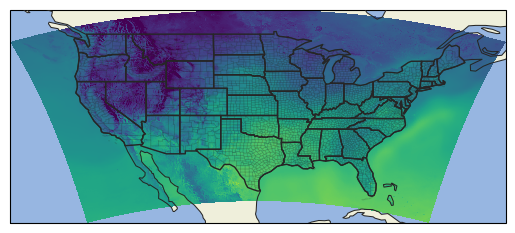

In [33]:
print(spring_herb.latitude)
# ax = EasyMap(crs=spring_herb.herbie.crs, scale='50m')
# ax = ax.STATES(linewidth=1, alpha=1)
# ax = ax.COUNTIES(linewidth=0.5)
# ax = ax.OCEAN().LAND().ax
ax = EasyMap().STATES(linewidth=1, alpha=1).COUNTIES(linewidth=0.5).OCEAN().LAND().ax

p = ax.pcolormesh(
    spring_herb.longitude,
    spring_herb.latitude,
    spring_herb.t2m,
    transform=pc,
    vmin=260,
    vmax=310
)

In [ ]:
ax = EasyMap(crs=spring_herb.herbie.crs, scale='50m')
ax = ax.STATES(linewidth=1, alpha=1)
ax = ax.COUNTIES(linewidth=0.5)
ax = ax.OCEAN().LAND().ax
# ax = ax.BORDERS().ax

# county_path = "/home/kaleb/Documents/GitHub/sentinel-hub/output_df.csv"
# county_df = pd.read_csv(county_path)
# counties_to_include = county_df['center_point'].values
# contains_flag = False

# for county in USCOUNTIES.geometries():

#     for pt in counties_to_include:
#         pt = eval(pt)
#         if county.contains(Point(pt)):
#             contains_flag = True

#     if contains_flag:
#         contains_flag = False
#     else:
#         ax.add_geometries([county], ccrs.PlateCarree(), facecolor='white') # , edgecolor='white')

cmap = plt.cm.get_cmap('jet')

p = ax.pcolormesh(
    spring_herb.longitude,
    spring_herb.latitude,
    spring_herb.t2m,
    transform=pc,
    cmap=cmap,
    vmin=260,
    vmax=310
#     **cm_tmp(units='K').cmap_kwargs,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    ticks=[260, 270, 280, 290, 300, 310],
    # label="Temperature (K)"
    # **cm_tmp(units="K").cbar_kwargs,)
)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# times_path = '/usr/share/fonts/truetype/msttcorefonts/Comic_Sans_MS.ttf'
# times = FontProperties(fname=times_path)
# plt.rcParams['font.family'] = times.get_name()

plt.tight_layout()
plt.savefig("/home/kaleb/Documents/other/wrf_figs_6-4/spring.pdf", format="pdf")
plt.show()

In [ ]:
# fall
fall_date = "20221001 16:00" #anywhere from september to december

fall_herb = Herbie(fall_date, model="hrrr",
                  product="sfc", save_dir=save_dir,
                  verbose=True, fxx=pred_hours,
                  priority= ['pando', 'pando2', 'aws', 'nomads',
                                           'google', 'azure'],# ['pando', 'pando2', 'aws', 'nomads'],
                  overwrite=False).xarray(":(?:TMP|RH):2 m")

In [ ]:
ax = EasyMap(crs=fall_herb.herbie.crs, scale='50m')
ax = ax.STATES(linewidth=1, alpha=1)
ax = ax.COUNTIES(linewidth=0.5)
ax = ax.OCEAN().LAND().ax
# ax = ax.BORDERS().ax

# county_path = "/home/kaleb/Documents/GitHub/sentinel-hub/output_df.csv"
# county_df = pd.read_csv(county_path)
# counties_to_include = county_df['center_point'].values
# contains_flag = False

# for county in USCOUNTIES.geometries():

#     for pt in counties_to_include:
#         pt = eval(pt)
#         if county.contains(Point(pt)):
#             contains_flag = True

#     if contains_flag:
#         contains_flag = False
#     else:
#         ax.add_geometries([county], ccrs.PlateCarree(), facecolor='white') # , edgecolor='white')

cmap = plt.cm.get_cmap('jet')

p = ax.pcolormesh(
    fall_herb.longitude,
    fall_herb.latitude,
    fall_herb.t2m,
    transform=pc,
    cmap=cmap,
    vmin=260,
    vmax=310
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    ticks=[260, 270, 280, 290, 300, 310],
    # label="Temperature (K)"
    # **cm_tmp(units="K").cbar_kwargs,
)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# times_path = '/usr/share/fonts/truetype/msttcorefonts/Comic_Sans_MS.ttf'
# times = FontProperties(fname=times_path)
# plt.rcParams['font.family'] = times.get_name()
plt.tight_layout()
plt.savefig("/home/kaleb/Documents/other/wrf_figs_6-4/fall.pdf", format="pdf")
plt.show()

In [ ]:
# summer
summer_date = "20220808 19:00"

summer_herb = Herbie(summer_date, model="hrrr",
                  product="sfc", save_dir=save_dir,
                  verbose=True, fxx=pred_hours,
                  priority= ['pando', 'pando2', 'aws', 'nomads',
                                           'google', 'azure'],# ['pando', 'pando2', 'aws', 'nomads'],
                  overwrite=False).xarray(":(?:TMP|RH):2 m")


In [ ]:
ax = EasyMap(crs=summer_herb.herbie.crs, scale="50m")
ax = ax.STATES(linewidth=1, alpha=1)
ax = ax.COUNTIES(linewidth=0.5)
ax = ax.OCEAN().LAND().ax
# ax = ax.BORDERS().ax

# county_path = "/home/kaleb/Documents/GitHub/sentinel-hub/output_df.csv"
# county_df = pd.read_csv(county_path)
# counties_to_include = county_df['center_point'].values
# contains_flag = False

# for county in USCOUNTIES.geometries():

#     for pt in counties_to_include:
#         pt = eval(pt)
#         if county.contains(Point(pt)):
#             contains_flag = True

#     if contains_flag:
#         contains_flag = False
#     else:
#         ax.add_geometries([county], ccrs.PlateCarree(), facecolor='white') # , edgecolor='white')

cmap = plt.cm.get_cmap('jet')


p = ax.pcolormesh(
    summer_herb.longitude,
    summer_herb.latitude,
    summer_herb.t2m,
    transform=pc,
    cmap=cmap,
    vmin=260,
    vmax=310,
)

cbar = plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.9,
    #**cm_tmp(units="K").cbar_kwargs,
    ticks= [260, 270, 280, 290, 300, 310],
    # label="Temperature (K)"
)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# times_path = '/usr/share/fonts/truetype/msttcorefonts/Comic_Sans_MS.ttf'
# times = FontProperties(fname=times_path)
# plt.rcParams['font.family'] = times.get_name()

plt.tight_layout()
plt.savefig("/home/kaleb/Documents/other/wrf_figs_6-4/summer.pdf", format="pdf")
plt.show()

In [ ]:
# winter
winter_date = "20220103 12:00"
winter_herb = Herbie(winter_date, model="hrrr",
                  product="sfc", save_dir=save_dir,
                  verbose=True, fxx=pred_hours,
                  priority= ['pando', 'pando2', 'aws', 'nomads',
                                           'google', 'azure'],# ['pando', 'pando2', 'aws', 'nomads'],
                  overwrite=True).xarray(":(?:TMP|RH):2 m")


In [ ]:
ax = EasyMap(crs=winter_herb.herbie.crs, dpi=100, scale="50m") # .PLACES(labels=False, country='United States')# .set_extent([-130, -60, 23, 45])
ax = ax.STATES(linewidth=1, alpha=1)
ax = ax.COUNTIES(linewidth=0.5)
ax = ax.OCEAN().LAND().ax
# ax = ax.BORDERS(linewidth=1.25, alpha=1).ax

county_path = "/home/kaleb/Documents/GitHub/sentinel-hub/output_df.csv"
county_df = pd.read_csv(county_path)
counties_to_include = county_df['center_point'].values
contains_flag = False

for county in USCOUNTIES.geometries():

    for pt in counties_to_include:
        pt = eval(pt)
        if county.contains(Point(pt)):
            contains_flag = True

    if contains_flag:
        contains_flag = False
    else:
        ax.add_geometries([county], ccrs.PlateCarree(), facecolor='white') # , edgecolor='white')

cmap = plt.cm.get_cmap('jet')
p = ax.pcolormesh(
    winter_herb.longitude,
    winter_herb.latitude,
    winter_herb.t2m,
    transform=pc,
    cmap=cmap,
    vmin=260,
    vmax=310
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    ticks=[260, 270, 280, 290, 300, 310],
    # label="Temperature (K)"
    # **cm_tmp(units="K").cbar_kwargs,
)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# times_path = '/usr/share/fonts/truetype/msttcorefonts/Comic_Sans_MS.ttf'
# times = FontProperties(fname=times_path)
# plt.rcParams['font.family'] = times.get_name()

# plt.title(
#     label="WRF-HRRR Computed Dataset\nAveraged Temperature Winter 2022",
#     loc="left",
# )
plt.tight_layout()
plt.savefig("/home/kaleb/Documents/other/wrf_figs_6-4/winter.pdf", format='pdf', bbox_inches='tight')
plt.show()
